In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications import EfficientNetB7
from keras.applications.xception import Xception
from tensorflow.keras.models import load_model
from pickle import load
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()


/var/folders/6w/8_xbb_rs6mq2x4r0cyl6nmbr0000gn/T/ipykernel_18891/1851380920.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

In [96]:
# #Defining Model
# def extract_features(directory, model):
        
#         features = {}
#         for img in tqdm(os.listdir(directory)):
#             filename = directory + "/" + img
#             image = Image.open(filename)
#             image = image.resize((299,299))
#             image = np.expand_dims(image, axis=0)
#             image = image/127.5
#             image = image - 1.0
#             feature = model.predict(image)
#             features[img] = feature
#         return features

In [97]:
def extract_features(filename, model):
        try:
            image = Image.open(filename)
            
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
            return None
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

In [98]:
def word_for_id(integer, tokenizer):
 for word, index in tokenizer.word_index.items():
     if index == integer:
         return word
 return None


In [99]:
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

In [102]:
img_path = ('/Users/sarthak/Documents/ICG/movies-1280x720.webp')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



start two people are sitting on bus outside store end


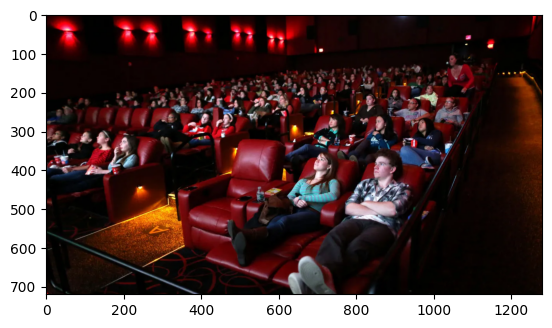

In [103]:
max_length = 32
tokenizer = load(open("/Users/sarthak/Documents/ICG/tokenizer.p","rb"))
model = load_model('/Users/sarthak/Documents/ICG/Model_saved/fnl_epoch_45.h5')
xception_model = Xception( include_top=False, pooling='avg' )
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)